In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [3]:
df=pd.read_csv('Fatiuge.csv')

In [4]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [5]:
df.drop('Sl. No.', axis=1, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

In [7]:
df.shape

(437, 26)

In [8]:
df1=df.iloc[:, 10:]

In [9]:
df1.describe()

,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,65.080092,20.814645,0.388398,0.299588,0.823021,0.015785,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,21.477650,8.072207,0.096364,0.246045,0.279028,0.005205,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,0.000000,0.000000,0.170000,0.160000,0.370000,0.002000,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,60.000000,24.000000,0.340000,0.240000,0.700000,0.012000,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,60.000000,24.000000,0.400000,0.260000,0.760000,0.016000,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,60.000000,24.000000,0.430000,0.290000,0.800000,0.019000,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,120.000000,24.000000,0.630000,2.050000,1.600000,0.031000,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


In [10]:
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


<AxesSubplot:xlabel='Fatigue', ylabel='Density'>

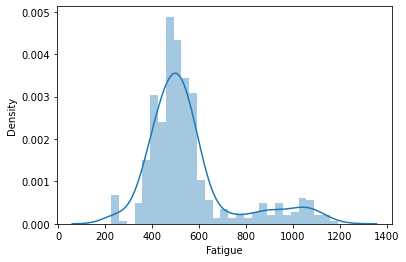

In [11]:
sns.distplot(df['Fatigue'])

In [12]:
df.columns

Index(['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt',
       'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio',
       'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

In [13]:
features=['Fatigue','C', 'Cr', 'Ni']

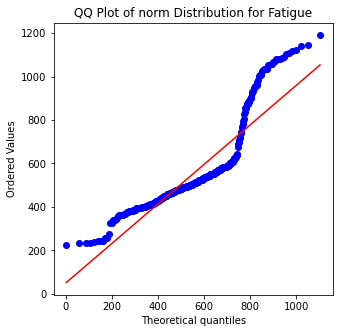

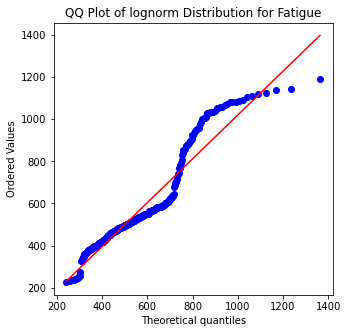

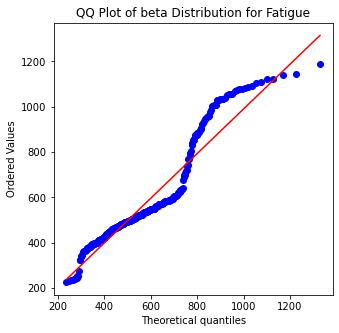

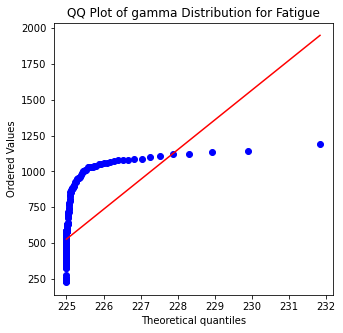

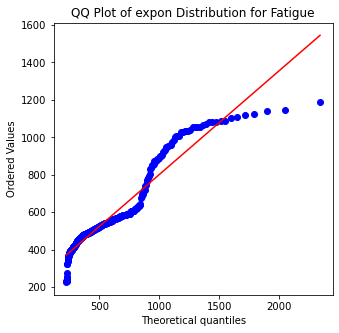

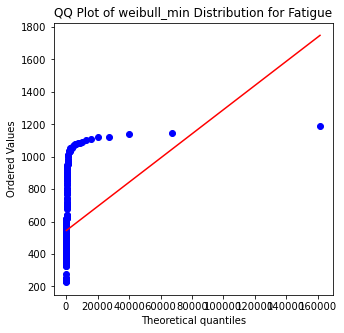

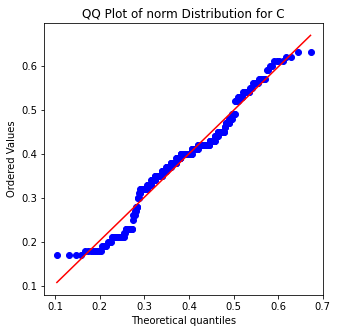

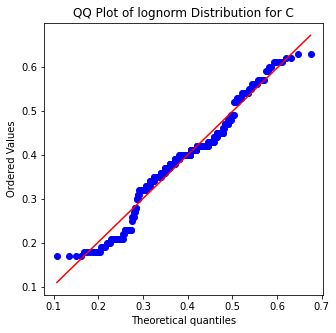

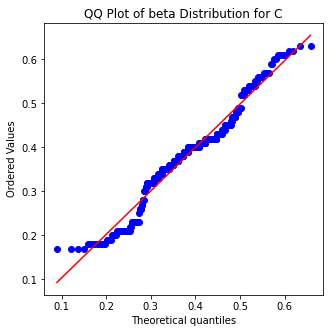

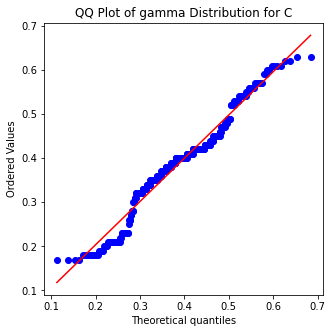

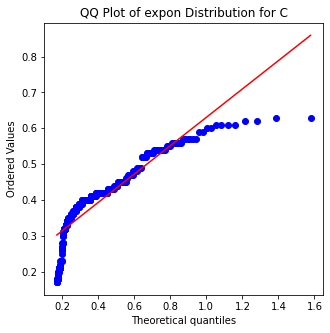

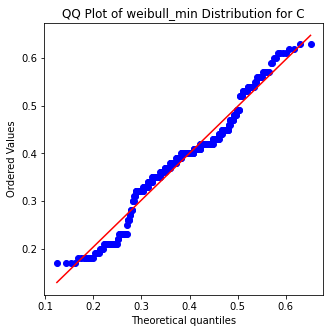

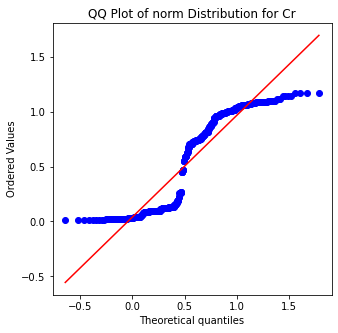

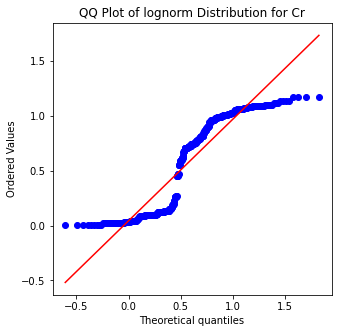

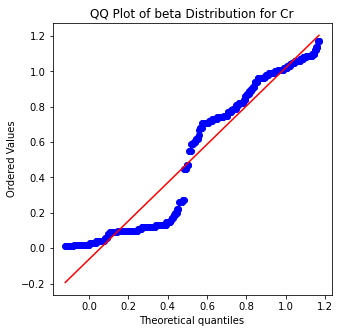

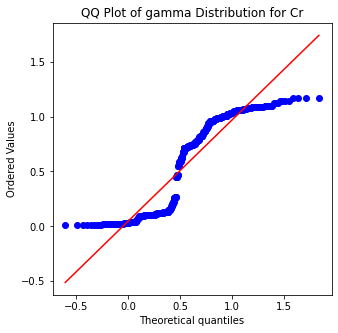

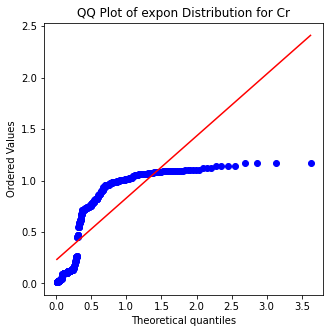

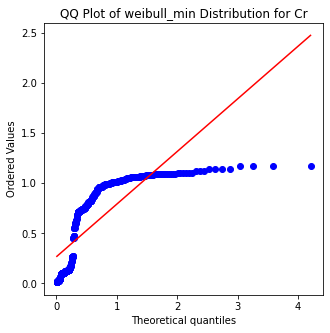

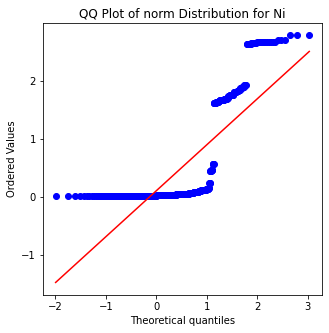

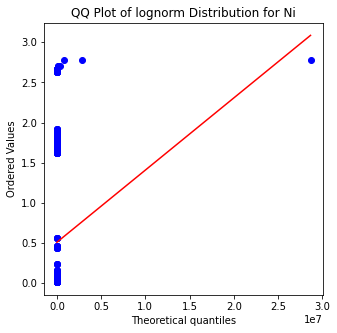

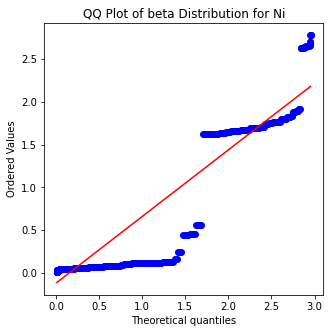

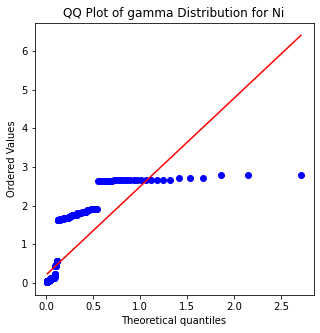

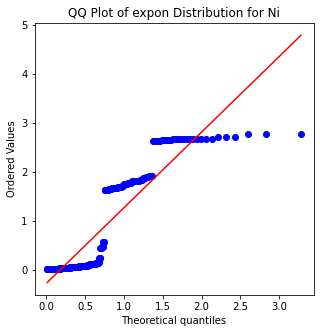

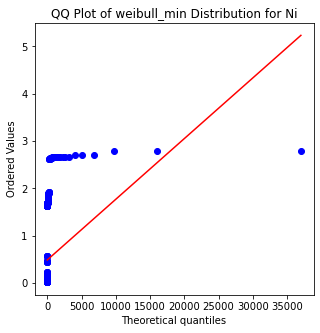

In [14]:
import scipy.stats as stats

# Define the list of distributions to test
distributions = ['norm','lognorm', 'beta', 'gamma', 'expon', 'weibull_min']

# Loop over the columns in the DataFrame
for col in features:
    # Select only the non-null values of the column
    data = df[col].dropna()
    
    # Loop over the distributions to test
    for dist in distributions:
        # Fit the distribution to the data
        if dist == 'weibull_min':
            params = stats.weibull_min.fit(data)
        else:
            params = getattr(stats, dist).fit(data)
        
        # Generate random samples from the fitted distribution
        if dist == 'weibull_min':
            rvs = stats.weibull_min.rvs(*params[:-2], loc=params[-2], scale=params[-1], size=len(data))
        else:
            rvs = getattr(stats, dist).rvs(*params[:-2], loc=params[-2], scale=params[-1], size=len(data))
        
        # Create the QQ plot
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        stats.probplot(data, dist=dist, sparams=params, plot=ax)
        ax.set_title(f'QQ Plot of {dist} Distribution for {col}')
        plt.show()


<AxesSubplot:xlabel='Fatigue'>

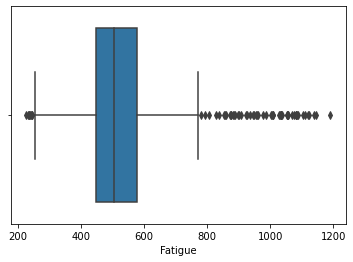

In [15]:
sns.boxplot(df['Fatigue'])

In [16]:
df.shape

(437, 26)

In [17]:

df.corr()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
NT,1.000000,-0.733562,-0.744072,-0.746162,0.774140,0.704048,0.773907,0.680719,0.623976,-0.643439,...,-0.172272,0.349784,0.429045,0.214173,0.313724,-0.275120,-0.388146,-0.107130,-0.085675,0.649459
THT,-0.733562,1.000000,0.999487,0.532870,-0.888675,-0.808212,-0.888408,-0.781432,-0.716294,0.946717,...,-0.154367,0.018620,-0.081163,-0.123265,-0.178605,0.193575,0.012032,-0.020254,0.125157,-0.656615
THt,-0.744072,0.999487,1.000000,0.537420,-0.889131,-0.808627,-0.888864,-0.781833,-0.716662,0.947097,...,-0.152671,0.023860,-0.090569,-0.125586,-0.185783,0.194496,0.015020,-0.025964,0.125478,-0.655897
THQCr,-0.746162,0.532870,0.537420,1.000000,-0.477836,-0.434572,-0.477693,-0.420172,-0.385148,0.514298,...,0.337895,-0.262757,-0.604618,-0.310723,-0.442909,0.238366,0.518123,0.339716,0.013883,-0.553098
CT,0.774140,-0.888675,-0.889131,-0.477836,1.000000,0.909458,0.999700,0.879323,0.806025,-0.786156,...,0.069950,0.020457,0.202449,0.200677,0.266870,-0.245155,-0.080275,-0.045154,-0.175935,0.850296
Ct,0.704048,-0.808212,-0.808627,-0.434572,0.909458,1.000000,0.909506,0.829540,0.832438,-0.711212,...,0.046252,0.035400,0.170568,0.203678,0.234012,-0.221181,-0.080861,-0.047728,-0.159301,0.778942
DT,0.773907,-0.888408,-0.888864,-0.477693,0.999700,0.909506,1.000000,0.888118,0.807133,-0.785889,...,0.070575,0.014695,0.205448,0.202648,0.264147,-0.245533,-0.079074,-0.045767,-0.175925,0.848612
Dt,0.680719,-0.781432,-0.781833,-0.420172,0.879323,0.829540,0.888118,1.000000,0.752087,-0.689811,...,0.066872,-0.084850,0.264144,0.170291,0.173871,-0.222986,-0.046088,-0.034599,-0.144792,0.726105
QmT,0.623976,-0.716294,-0.716662,-0.385148,0.806025,0.832438,0.807133,0.752087,1.000000,-0.640571,...,0.056382,0.016489,0.163179,0.161751,0.215103,-0.197601,-0.064704,-0.036395,-0.141808,0.687954
TT,-0.643439,0.946717,0.947097,0.514298,-0.786156,-0.711212,-0.785889,-0.689811,-0.640571,1.000000,...,-0.147391,0.088601,-0.040170,-0.116524,-0.107609,0.167432,-0.005740,-0.038945,0.080460,-0.634550


<AxesSubplot:>

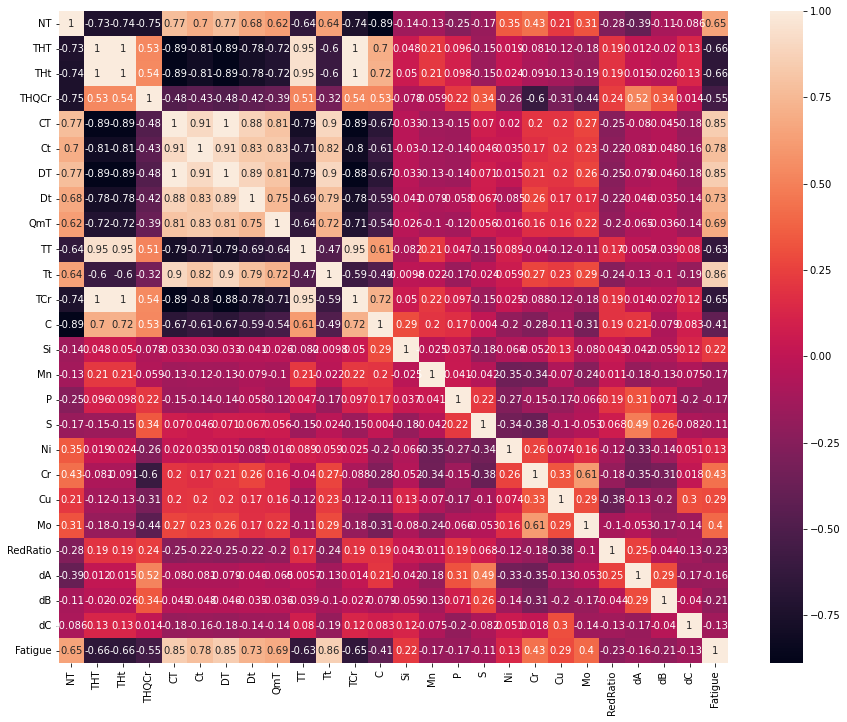

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [19]:
df.head()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [20]:
x=df.iloc[:,1:25]
y=df.iloc[:,25]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [22]:
regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred_train=regr.predict(X_train)

y_pred = regr.predict(X_test)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9718963707571864
0.9700351659308025


In [23]:
# Calculate the mean squared error and R^2 score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train=r2_score(y_train, y_pred_train)
# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2_train Score: {r2_train}")
print(f"R^2 Score: {r2}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Mean Squared Error: 895.065938101877
R^2_train Score: 0.9718963707571864
R^2 Score: 0.9700351659308025
MAE: 21.93467398623124


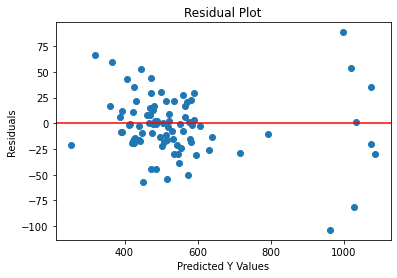

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Y Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Text(0.5, 1.0, 'Distribution of residuals')

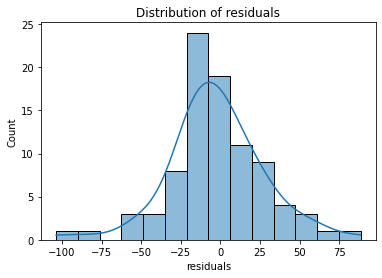

In [25]:
sns.histplot(residuals, kde=True)
plt.xlabel('residuals')
plt.title('Distribution of residuals')

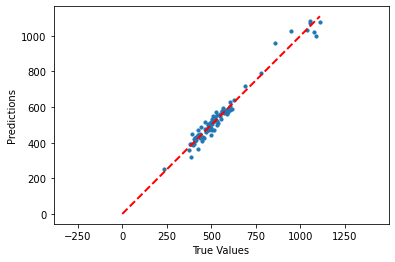

In [26]:
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--', linewidth=2)
plt.axis('equal')
plt.show()

In [103]:
import statsmodels.api as sm

# Add a constant term to the features
X = sm.add_constant(X_train)

# Fit the multiple linear regression model using OLS
model = sm.OLS(y_train, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Fatigue   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     533.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          9.28e-241
Time:                        18:53:36   Log-Likelihood:                -1691.0
No. Observations:                 349   AIC:                             3428.
Df Residuals:                     326   BIC:                             3517.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0574      7.300      1.789      0.0

In [135]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Calculate the mean squared error and R^2 score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Mean Squared Error: 1226.677137363141
R^2 Score: 0.9635132721546666
MAE: 23.92882614473862


In [138]:
from sklearn.svm import SVR
svr = SVR(C=100, epsilon=0.1, kernel='rbf', gamma='scale')

# Train the SVR model on the training data
svr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred_train = svr.predict(X_train)
y_pred = svr.predict(X_test)

# Calculate the R^2 score of the SVR model
r2_train=r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
#mse cal.
mse = mean_squared_error(y_test, y_pred)

# Print the R^2 score
print(f"R^2 Scoretrain: {r2_train}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

R^2 Scoretrain: 0.8123478143053897
R^2 Score: 0.7883305262322543
Mean Squared Error: 7116.28911337934
MAE: 64.38455966714376


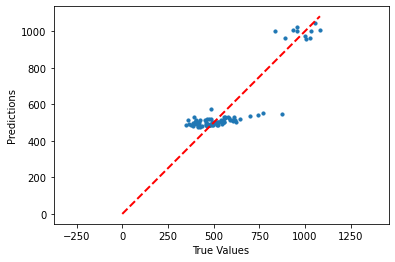

In [141]:
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--', linewidth=2)
plt.axis('equal')
plt.show()

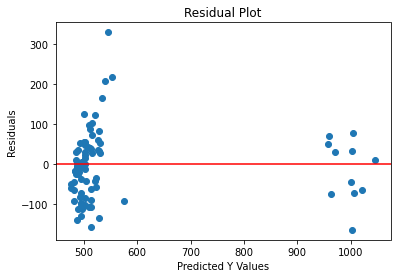

In [139]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Y Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Text(0.5, 1.0, 'Distribution of residuals')

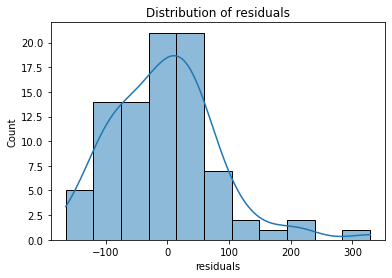

In [140]:
sns.histplot(residuals, kde=True)
plt.xlabel('residuals')
plt.title('Distribution of residuals')

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.tree import plot_tree

In [29]:
# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the train and test data
y_pred_train=regressor.predict(X_train)
y_pred = regressor.predict(X_test)

# Calculate the mean squared error and R^2 score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train1= r2_score(y_train, y_pred_train)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 582.1503465909092
R^2 Score: 0.9805108899843568


In [30]:
# Print the R^2 score
print(f"R^2 Scoretrain: {r2_train1}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

R^2 Scoretrain: 0.996782368919627
R^2 Score: 0.9805108899843568
Mean Squared Error: 582.1503465909092
MAE: 17.70284090909091


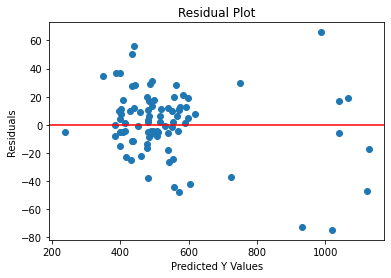

In [31]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Y Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Text(0.5, 1.0, 'Distribution of residuals')

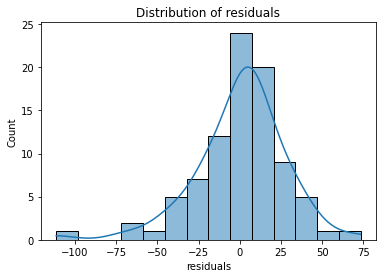

In [133]:
sns.histplot(residuals, kde=True)
plt.xlabel('residuals')
plt.title('Distribution of residuals')

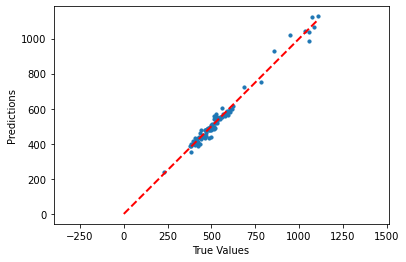

In [32]:
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--', linewidth=2)
plt.axis('equal')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_std= pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [25]:
x_std=df_std.drop(columns=['Fatigue'])
y_std=df_std['Fatigue']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)
# Create polynomial features
poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.03
Root Mean Squared Error: 0.16
R-squared: 0.98


In [30]:
X=x_std

In [31]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF values
print(vif)


     VIF Factor  features
0     74.486271        NT
1   5806.690928       THT
2           inf       THt
3     34.353666     THQCr
4           inf        CT
5      7.672958        Ct
6   4742.955172        DT
7     15.326960        Dt
8      3.477983       QmT
9     15.678913        TT
10          inf        Tt
11          inf       TCr
12    16.768362         C
13     2.579752        Si
14    11.501549        Mn
15     1.307898         P
16     1.765300         S
17     9.731566        Ni
18    18.003815        Cr
19     1.721624        Cu
20     3.683637        Mo
21     1.377030  RedRatio
22     2.298362        dA
23     1.488793        dB
24     1.398450        dC


In [32]:
# Drop features with VIF values greater than 5
drop_cols = vif[vif["VIF Factor"] > 10]["features"].values
X = X.drop(drop_cols, axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_std, test_size=0.2, random_state=0)
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train=model.predict(X_train)

y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 Score: 0.7498221824892649
Mean Squared Error: 0.2591151774457376


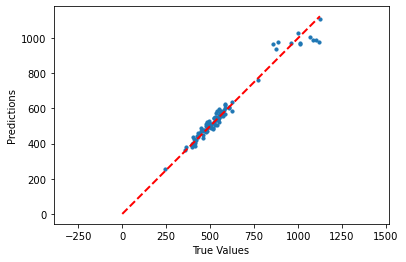

In [72]:
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--', linewidth=2)
plt.axis('equal')
plt.show()

In [36]:
from sklearn.svm import SVR
svr = SVR(C=50, epsilon=0.1, kernel='rbf', gamma='scale')

# Train the SVR model on the training data
svr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred_std_train = svr.predict(X_train)
y_pred_std = svr.predict(X_test)

# Calculate the R^2 score of the SVR model
r2_train=r2_score(y_train, y_pred_std_train)
r2 = r2_score(y_test, y_pred_std)
#mse cal.
mse = mean_squared_error(y_test, y_pred_std)

# Print the R^2 score
print(f"R^2 Scoretrain: {r2_train}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred_std)
print(f"MAE: {mae}")

R^2 Scoretrain: 0.959180861181248
R^2 Score: 0.8588847862071731
Mean Squared Error: 0.1461564179672025
MAE: 0.3000732033124464


In [67]:
# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error and R^2 score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 634.8262034090911
R^2 Score: 0.9846454753926075


In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Extract the features and target variable
X = df.drop('Fatigue', axis=1)
y = df['Fatigue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)
print('r_squared: %.2f' %r2)


RMSE: 23.55
r_squared: 0.99


In [50]:
r2

0.9865849793523851

In [63]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0.01, 0.1, 1.0],
    'reg_lambda': [0.01, 0.1, 1.0]
}

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the grid search object for hyperparameter tuning
grid_search = GridSearchCV(
    xgb_model, param_grid=param_grid, cv=5, 
    n_jobs=-1)

# Fit the model to the data
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_)


{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.01, 'subsample': 1.0}


In [64]:
# Extract the features and target variable
X = df.drop('Fatigue', axis=1)
y = df['Fatigue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, 
                         colsample_bytree= 0.6, gamma= 0, learning_rate=0.1, max_depth= 5, reg_alpha= 1.0, reg_lambda= 0.01, subsample= 1.0)

# Train the model on the training set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

y_train_pred= model.predict(X_train)
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_train= r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)
print('r_squared_train: %.2f' %r2_train)
print('r_squared: %.2f' %r2)

RMSE: 22.65
r_squared_train: 1.00
r_squared: 0.99


In [66]:
r2_train

0.9986497554821817

In [62]:
r2

0.9875883138979533

In [ ]:
'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.01, 'subsample': 1.0

In [63]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


# Extract the features and target vector
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)




Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 340316.5938
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 339847.8125
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 339402.1875
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 338994.2812
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 338579.6875
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 338183.1875
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 337783.9688
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 337345.8438
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 336898.9062
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 336467.7812
Epoch 11/100
14/14 [==============================] - 0s 4ms/step - loss: 336000.6562
Epoch 12/100
14/14 [==============================] - 0s 4ms/st

In [65]:
# Define the ANN model
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the data
model.fit(X, y, epochs=5000, batch_size=32)

# Evaluate the model on the data
loss = model.evaluate(X, y)
print("Mean squared error: ", loss)

Epoch 1/5000
14/14 [==============================] - 1s 1ms/step - loss: 341205.4062
Epoch 2/5000
14/14 [==============================] - 0s 2ms/step - loss: 340829.0938
Epoch 3/5000
14/14 [==============================] - 0s 2ms/step - loss: 340492.0938
Epoch 4/5000
14/14 [==============================] - 0s 2ms/step - loss: 340195.4062
Epoch 5/5000
14/14 [==============================] - 0s 3ms/step - loss: 339914.2188
Epoch 6/5000
14/14 [==============================] - 0s 3ms/step - loss: 339644.6562
Epoch 7/5000
14/14 [==============================] - 0s 2ms/step - loss: 339393.4062
Epoch 8/5000
14/14 [==============================] - 0s 2ms/step - loss: 339154.7188
Epoch 9/5000
14/14 [==============================] - 0s 3ms/step - loss: 338922.1562
Epoch 10/5000
14/14 [==============================] - 0s 3ms/step - loss: 338694.3750
Epoch 11/5000
14/14 [==============================] - 0s 3ms/step - loss: 338467.5625
Epoch 12/5000
14/14 [==============================]

14/14 [==============================] - 0s 5ms/step - loss: 165349.0000
Epoch 189/5000
14/14 [==============================] - 0s 5ms/step - loss: 164282.1719
Epoch 190/5000
14/14 [==============================] - 0s 4ms/step - loss: 163229.6250
Epoch 191/5000
14/14 [==============================] - 0s 5ms/step - loss: 162205.1406
Epoch 192/5000
14/14 [==============================] - 0s 4ms/step - loss: 161165.9062
Epoch 193/5000
14/14 [==============================] - 0s 2ms/step - loss: 160134.6094
Epoch 194/5000
14/14 [==============================] - 0s 2ms/step - loss: 159122.6875
Epoch 195/5000
14/14 [==============================] - 0s 3ms/step - loss: 158102.4062
Epoch 196/5000
14/14 [==============================] - 0s 4ms/step - loss: 157102.2031
Epoch 197/5000
14/14 [==============================] - 0s 4ms/step - loss: 156071.0156
Epoch 198/5000
14/14 [==============================] - 0s 4ms/step - loss: 155108.4062
Epoch 199/5000
14/14 [=========================

14/14 [==============================] - 0s 5ms/step - loss: 39338.0312
Epoch 376/5000
14/14 [==============================] - 0s 5ms/step - loss: 38964.8047
Epoch 377/5000
14/14 [==============================] - 0s 5ms/step - loss: 38600.3281
Epoch 378/5000
14/14 [==============================] - 0s 5ms/step - loss: 38230.1680
Epoch 379/5000
14/14 [==============================] - 0s 5ms/step - loss: 37872.3516
Epoch 380/5000
14/14 [==============================] - 0s 5ms/step - loss: 37513.2188
Epoch 381/5000
14/14 [==============================] - 0s 5ms/step - loss: 37163.5156
Epoch 382/5000
14/14 [==============================] - 0s 5ms/step - loss: 36805.6523
Epoch 383/5000
14/14 [==============================] - 0s 4ms/step - loss: 36461.8984
Epoch 384/5000
14/14 [==============================] - 0s 4ms/step - loss: 36112.9414
Epoch 385/5000
14/14 [==============================] - 0s 5ms/step - loss: 35767.3672
Epoch 386/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 2ms/step - loss: 9857.1426
Epoch 564/5000
14/14 [==============================] - 0s 2ms/step - loss: 9817.2490
Epoch 565/5000
14/14 [==============================] - 0s 2ms/step - loss: 9777.6738
Epoch 566/5000
14/14 [==============================] - 0s 3ms/step - loss: 9739.0869
Epoch 567/5000
14/14 [==============================] - 0s 5ms/step - loss: 9699.6182
Epoch 568/5000
14/14 [==============================] - 0s 4ms/step - loss: 9666.3105
Epoch 569/5000
14/14 [==============================] - 0s 5ms/step - loss: 9623.9814
Epoch 570/5000
14/14 [==============================] - 0s 5ms/step - loss: 9588.0479
Epoch 571/5000
14/14 [==============================] - 0s 5ms/step - loss: 9548.5840
Epoch 572/5000
14/14 [==============================] - 0s 4ms/step - loss: 9513.0107
Epoch 573/5000
14/14 [==============================] - 0s 4ms/step - loss: 9478.3232
Epoch 574/5000
14/14 [==============================] - 0s 4ms/step -

14/14 [==============================] - 0s 5ms/step - loss: 5638.4888
Epoch 754/5000
14/14 [==============================] - 0s 8ms/step - loss: 5625.6978
Epoch 755/5000
14/14 [==============================] - 0s 5ms/step - loss: 5609.4937
Epoch 756/5000
14/14 [==============================] - 0s 5ms/step - loss: 5596.1880
Epoch 757/5000
14/14 [==============================] - 0s 5ms/step - loss: 5584.7061
Epoch 758/5000
14/14 [==============================] - 0s 6ms/step - loss: 5569.7241
Epoch 759/5000
14/14 [==============================] - 0s 5ms/step - loss: 5557.2056
Epoch 760/5000
14/14 [==============================] - 0s 5ms/step - loss: 5544.0503
Epoch 761/5000
14/14 [==============================] - 0s 4ms/step - loss: 5531.6392
Epoch 762/5000
14/14 [==============================] - 0s 5ms/step - loss: 5517.9810
Epoch 763/5000
14/14 [==============================] - 0s 4ms/step - loss: 5506.1636
Epoch 764/5000
14/14 [==============================] - 0s 5ms/step -

14/14 [==============================] - 0s 5ms/step - loss: 3771.5044
Epoch 944/5000
14/14 [==============================] - 0s 5ms/step - loss: 3764.6150
Epoch 945/5000
14/14 [==============================] - 0s 4ms/step - loss: 3757.3953
Epoch 946/5000
14/14 [==============================] - 0s 4ms/step - loss: 3750.1606
Epoch 947/5000
14/14 [==============================] - 0s 5ms/step - loss: 3743.6995
Epoch 948/5000
14/14 [==============================] - 0s 4ms/step - loss: 3737.4387
Epoch 949/5000
14/14 [==============================] - 0s 4ms/step - loss: 3730.6382
Epoch 950/5000
14/14 [==============================] - 0s 4ms/step - loss: 3724.5913
Epoch 951/5000
14/14 [==============================] - 0s 4ms/step - loss: 3716.8381
Epoch 952/5000
14/14 [==============================] - 0s 4ms/step - loss: 3709.9290
Epoch 953/5000
14/14 [==============================] - 0s 4ms/step - loss: 3703.0527
Epoch 954/5000
14/14 [==============================] - 0s 4ms/step -

Epoch 1038/5000
14/14 [==============================] - 0s 5ms/step - loss: 3193.8877
Epoch 1039/5000
14/14 [==============================] - 0s 5ms/step - loss: 3188.6807
Epoch 1040/5000
14/14 [==============================] - 0s 5ms/step - loss: 3182.2170
Epoch 1041/5000
14/14 [==============================] - 0s 4ms/step - loss: 3177.5210
Epoch 1042/5000
14/14 [==============================] - 0s 4ms/step - loss: 3172.5398
Epoch 1043/5000
14/14 [==============================] - 0s 5ms/step - loss: 3168.0269
Epoch 1044/5000
14/14 [==============================] - 0s 5ms/step - loss: 3162.1978
Epoch 1045/5000
14/14 [==============================] - 0s 5ms/step - loss: 3157.5051
Epoch 1046/5000
14/14 [==============================] - 0s 5ms/step - loss: 3151.3806
Epoch 1047/5000
14/14 [==============================] - 0s 5ms/step - loss: 3146.9749
Epoch 1048/5000
14/14 [==============================] - 0s 4ms/step - loss: 3142.6453
Epoch 1049/5000
14/14 [====================

14/14 [==============================] - 0s 4ms/step - loss: 2747.8569
Epoch 1133/5000
14/14 [==============================] - 0s 4ms/step - loss: 2743.9570
Epoch 1134/5000
14/14 [==============================] - 0s 4ms/step - loss: 2739.7869
Epoch 1135/5000
14/14 [==============================] - 0s 5ms/step - loss: 2736.4934
Epoch 1136/5000
14/14 [==============================] - 0s 4ms/step - loss: 2732.5371
Epoch 1137/5000
14/14 [==============================] - 0s 5ms/step - loss: 2726.2463
Epoch 1138/5000
14/14 [==============================] - 0s 5ms/step - loss: 2721.8730
Epoch 1139/5000
14/14 [==============================] - 0s 4ms/step - loss: 2718.1555
Epoch 1140/5000
14/14 [==============================] - 0s 5ms/step - loss: 2713.8494
Epoch 1141/5000
14/14 [==============================] - 0s 5ms/step - loss: 2711.0903
Epoch 1142/5000
14/14 [==============================] - 0s 4ms/step - loss: 2705.0098
Epoch 1143/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 5ms/step - loss: 2060.4365
Epoch 1321/5000
14/14 [==============================] - 0s 5ms/step - loss: 2057.6943
Epoch 1322/5000
14/14 [==============================] - 0s 4ms/step - loss: 2054.3235
Epoch 1323/5000
14/14 [==============================] - 0s 4ms/step - loss: 2051.2966
Epoch 1324/5000
14/14 [==============================] - 0s 4ms/step - loss: 2048.5459
Epoch 1325/5000
14/14 [==============================] - 0s 5ms/step - loss: 2045.4077
Epoch 1326/5000
14/14 [==============================] - 0s 4ms/step - loss: 2043.1484
Epoch 1327/5000
14/14 [==============================] - 0s 4ms/step - loss: 2039.1917
Epoch 1328/5000
14/14 [==============================] - 0s 5ms/step - loss: 2036.3077
Epoch 1329/5000
14/14 [==============================] - 0s 5ms/step - loss: 2034.5707
Epoch 1330/5000
14/14 [==============================] - 0s 4ms/step - loss: 2031.0215
Epoch 1331/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 5ms/step - loss: 1588.8199
Epoch 1509/5000
14/14 [==============================] - 0s 5ms/step - loss: 1586.8789
Epoch 1510/5000
14/14 [==============================] - 0s 5ms/step - loss: 1586.4943
Epoch 1511/5000
14/14 [==============================] - 0s 4ms/step - loss: 1583.5381
Epoch 1512/5000
14/14 [==============================] - 0s 5ms/step - loss: 1581.3926
Epoch 1513/5000
14/14 [==============================] - 0s 5ms/step - loss: 1579.2878
Epoch 1514/5000
14/14 [==============================] - 0s 5ms/step - loss: 1577.0370
Epoch 1515/5000
14/14 [==============================] - 0s 6ms/step - loss: 1575.4927
Epoch 1516/5000
14/14 [==============================] - 0s 5ms/step - loss: 1574.1141
Epoch 1517/5000
14/14 [==============================] - 0s 5ms/step - loss: 1570.9431
Epoch 1518/5000
14/14 [==============================] - 0s 5ms/step - loss: 1569.0485
Epoch 1519/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 2ms/step - loss: 1281.5098
Epoch 1697/5000
14/14 [==============================] - 0s 2ms/step - loss: 1279.8318
Epoch 1698/5000
14/14 [==============================] - 0s 3ms/step - loss: 1277.6688
Epoch 1699/5000
14/14 [==============================] - 0s 5ms/step - loss: 1276.4703
Epoch 1700/5000
14/14 [==============================] - 0s 5ms/step - loss: 1276.0658
Epoch 1701/5000
14/14 [==============================] - 0s 2ms/step - loss: 1274.0226
Epoch 1702/5000
14/14 [==============================] - 0s 2ms/step - loss: 1273.6298
Epoch 1703/5000
14/14 [==============================] - 0s 2ms/step - loss: 1272.0748
Epoch 1704/5000
14/14 [==============================] - 0s 3ms/step - loss: 1270.6609
Epoch 1705/5000
14/14 [==============================] - 0s 4ms/step - loss: 1269.8411
Epoch 1706/5000
14/14 [==============================] - 0s 6ms/step - loss: 1268.3549
Epoch 1707/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 1097.0518
Epoch 1885/5000
14/14 [==============================] - 0s 4ms/step - loss: 1096.6158
Epoch 1886/5000
14/14 [==============================] - 0s 4ms/step - loss: 1095.5499
Epoch 1887/5000
14/14 [==============================] - 0s 5ms/step - loss: 1095.1847
Epoch 1888/5000
14/14 [==============================] - 0s 5ms/step - loss: 1094.1714
Epoch 1889/5000
14/14 [==============================] - 0s 5ms/step - loss: 1093.7207
Epoch 1890/5000
14/14 [==============================] - 0s 5ms/step - loss: 1092.9877
Epoch 1891/5000
14/14 [==============================] - 0s 5ms/step - loss: 1092.2797
Epoch 1892/5000
14/14 [==============================] - 0s 5ms/step - loss: 1091.4928
Epoch 1893/5000
14/14 [==============================] - 0s 6ms/step - loss: 1091.5323
Epoch 1894/5000
14/14 [==============================] - 0s 4ms/step - loss: 1090.0408
Epoch 1895/5000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 3ms/step - loss: 999.3350
Epoch 2073/5000
14/14 [==============================] - 0s 3ms/step - loss: 998.9403
Epoch 2074/5000
14/14 [==============================] - 0s 3ms/step - loss: 998.4290
Epoch 2075/5000
14/14 [==============================] - 0s 3ms/step - loss: 997.9703
Epoch 2076/5000
14/14 [==============================] - 0s 3ms/step - loss: 998.4554
Epoch 2077/5000
14/14 [==============================] - 0s 3ms/step - loss: 997.5067
Epoch 2078/5000
14/14 [==============================] - 0s 3ms/step - loss: 997.5073
Epoch 2079/5000
14/14 [==============================] - 0s 3ms/step - loss: 996.8083
Epoch 2080/5000
14/14 [==============================] - 0s 3ms/step - loss: 996.3998
Epoch 2081/5000
14/14 [==============================] - 0s 3ms/step - loss: 996.1559
Epoch 2082/5000
14/14 [==============================] - 0s 4ms/step - loss: 996.7781
Epoch 2083/5000
14/14 [==============================] - 0s 3ms/step -

14/14 [==============================] - 0s 3ms/step - loss: 948.6196
Epoch 2263/5000
14/14 [==============================] - 0s 3ms/step - loss: 948.4573
Epoch 2264/5000
14/14 [==============================] - 0s 3ms/step - loss: 948.8664
Epoch 2265/5000
14/14 [==============================] - 0s 4ms/step - loss: 948.0674
Epoch 2266/5000
14/14 [==============================] - 0s 3ms/step - loss: 948.7192
Epoch 2267/5000
14/14 [==============================] - 0s 3ms/step - loss: 948.2714
Epoch 2268/5000
14/14 [==============================] - 0s 3ms/step - loss: 947.8333
Epoch 2269/5000
14/14 [==============================] - 0s 3ms/step - loss: 947.3199
Epoch 2270/5000
14/14 [==============================] - 0s 4ms/step - loss: 947.1591
Epoch 2271/5000
14/14 [==============================] - 0s 3ms/step - loss: 947.7386
Epoch 2272/5000
14/14 [==============================] - 0s 3ms/step - loss: 947.8892
Epoch 2273/5000
14/14 [==============================] - 0s 3ms/step -

14/14 [==============================] - 0s 4ms/step - loss: 918.0992
Epoch 2453/5000
14/14 [==============================] - 0s 3ms/step - loss: 917.2504
Epoch 2454/5000
14/14 [==============================] - 0s 3ms/step - loss: 916.9713
Epoch 2455/5000
14/14 [==============================] - 0s 3ms/step - loss: 917.2181
Epoch 2456/5000
14/14 [==============================] - 0s 3ms/step - loss: 916.0942
Epoch 2457/5000
14/14 [==============================] - 0s 3ms/step - loss: 915.9041
Epoch 2458/5000
14/14 [==============================] - 0s 3ms/step - loss: 915.7330
Epoch 2459/5000
14/14 [==============================] - 0s 3ms/step - loss: 915.5492
Epoch 2460/5000
14/14 [==============================] - 0s 3ms/step - loss: 914.9695
Epoch 2461/5000
14/14 [==============================] - 0s 3ms/step - loss: 914.5655
Epoch 2462/5000
14/14 [==============================] - 0s 3ms/step - loss: 914.1348
Epoch 2463/5000
14/14 [==============================] - 0s 3ms/step -

14/14 [==============================] - 0s 5ms/step - loss: 879.1062
Epoch 2643/5000
14/14 [==============================] - 0s 5ms/step - loss: 878.5292
Epoch 2644/5000
14/14 [==============================] - 0s 5ms/step - loss: 878.9307
Epoch 2645/5000
14/14 [==============================] - 0s 4ms/step - loss: 878.1740
Epoch 2646/5000
14/14 [==============================] - 0s 5ms/step - loss: 878.5233
Epoch 2647/5000
14/14 [==============================] - 0s 5ms/step - loss: 877.7045
Epoch 2648/5000
14/14 [==============================] - 0s 5ms/step - loss: 877.7516
Epoch 2649/5000
14/14 [==============================] - 0s 4ms/step - loss: 877.6989
Epoch 2650/5000
14/14 [==============================] - 0s 4ms/step - loss: 877.4742
Epoch 2651/5000
14/14 [==============================] - 0s 5ms/step - loss: 877.7842
Epoch 2652/5000
14/14 [==============================] - 0s 5ms/step - loss: 877.4392
Epoch 2653/5000
14/14 [==============================] - 0s 5ms/step -

14/14 [==============================] - 0s 4ms/step - loss: 859.3713
Epoch 2833/5000
14/14 [==============================] - 0s 3ms/step - loss: 858.9963
Epoch 2834/5000
14/14 [==============================] - 0s 3ms/step - loss: 859.2659
Epoch 2835/5000
14/14 [==============================] - 0s 3ms/step - loss: 858.8249
Epoch 2836/5000
14/14 [==============================] - 0s 4ms/step - loss: 859.0818
Epoch 2837/5000
14/14 [==============================] - 0s 5ms/step - loss: 859.4553
Epoch 2838/5000
14/14 [==============================] - 0s 4ms/step - loss: 858.8445
Epoch 2839/5000
14/14 [==============================] - 0s 5ms/step - loss: 860.3306
Epoch 2840/5000
14/14 [==============================] - 0s 4ms/step - loss: 858.9752
Epoch 2841/5000
14/14 [==============================] - 0s 4ms/step - loss: 859.5214
Epoch 2842/5000
14/14 [==============================] - 0s 4ms/step - loss: 858.3607
Epoch 2843/5000
14/14 [==============================] - 0s 4ms/step -

14/14 [==============================] - 0s 4ms/step - loss: 845.5617
Epoch 3023/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.3541
Epoch 3024/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.5134
Epoch 3025/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.6957
Epoch 3026/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.4578
Epoch 3027/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.3702
Epoch 3028/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.3288
Epoch 3029/5000
14/14 [==============================] - 0s 4ms/step - loss: 844.8596
Epoch 3030/5000
14/14 [==============================] - 0s 4ms/step - loss: 844.9194
Epoch 3031/5000
14/14 [==============================] - 0s 4ms/step - loss: 845.1374
Epoch 3032/5000
14/14 [==============================] - 0s 4ms/step - loss: 844.9191
Epoch 3033/5000
14/14 [==============================] - 0s 4ms/step -

14/14 [==============================] - 0s 4ms/step - loss: 836.0542
Epoch 3213/5000
14/14 [==============================] - 0s 4ms/step - loss: 834.5929
Epoch 3214/5000
14/14 [==============================] - 0s 4ms/step - loss: 835.1716
Epoch 3215/5000
14/14 [==============================] - 0s 5ms/step - loss: 834.3138
Epoch 3216/5000
14/14 [==============================] - 0s 5ms/step - loss: 835.5625
Epoch 3217/5000
14/14 [==============================] - 0s 5ms/step - loss: 835.2741
Epoch 3218/5000
14/14 [==============================] - 0s 5ms/step - loss: 835.0036
Epoch 3219/5000
14/14 [==============================] - 0s 4ms/step - loss: 835.1061
Epoch 3220/5000
14/14 [==============================] - 0s 5ms/step - loss: 835.5621
Epoch 3221/5000
14/14 [==============================] - 0s 5ms/step - loss: 834.4829
Epoch 3222/5000
14/14 [==============================] - 0s 5ms/step - loss: 834.7161
Epoch 3223/5000
14/14 [==============================] - 0s 5ms/step -

14/14 [==============================] - 0s 988us/step - loss: 826.1694
Epoch 3403/5000
14/14 [==============================] - 0s 1ms/step - loss: 827.1059
Epoch 3404/5000
14/14 [==============================] - 0s 1ms/step - loss: 825.7986
Epoch 3405/5000
14/14 [==============================] - 0s 1ms/step - loss: 825.8651
Epoch 3406/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.3776
Epoch 3407/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.1030
Epoch 3408/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.3700
Epoch 3409/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.2048
Epoch 3410/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.0062
Epoch 3411/5000
14/14 [==============================] - 0s 1ms/step - loss: 826.4611
Epoch 3412/5000
14/14 [==============================] - 0s 1ms/step - loss: 825.5271
Epoch 3413/5000
14/14 [==============================] - 0s 1ms/step

14/14 [==============================] - 0s 1ms/step - loss: 819.5535
Epoch 3593/5000
14/14 [==============================] - 0s 1ms/step - loss: 819.8068
Epoch 3594/5000
14/14 [==============================] - 0s 1ms/step - loss: 818.8334
Epoch 3595/5000
14/14 [==============================] - 0s 1ms/step - loss: 818.9138
Epoch 3596/5000
14/14 [==============================] - 0s 1ms/step - loss: 819.1596
Epoch 3597/5000
14/14 [==============================] - 0s 1ms/step - loss: 818.7574
Epoch 3598/5000
14/14 [==============================] - 0s 1ms/step - loss: 819.0001
Epoch 3599/5000
14/14 [==============================] - 0s 1ms/step - loss: 818.6774
Epoch 3600/5000
14/14 [==============================] - 0s 1ms/step - loss: 821.2291
Epoch 3601/5000
14/14 [==============================] - 0s 496us/step - loss: 818.7272
Epoch 3602/5000
14/14 [==============================] - 0s 442us/step - loss: 819.8529
Epoch 3603/5000
14/14 [==============================] - 0s 1ms/st

14/14 [==============================] - 0s 1ms/step - loss: 816.3251
Epoch 3688/5000
14/14 [==============================] - 0s 2ms/step - loss: 816.1547
Epoch 3689/5000
14/14 [==============================] - 0s 1ms/step - loss: 816.2921
Epoch 3690/5000
14/14 [==============================] - 0s 1ms/step - loss: 816.4041
Epoch 3691/5000
14/14 [==============================] - 0s 1ms/step - loss: 815.9307
Epoch 3692/5000
14/14 [==============================] - 0s 1ms/step - loss: 815.5405
Epoch 3693/5000
14/14 [==============================] - 0s 1ms/step - loss: 816.1909
Epoch 3694/5000
14/14 [==============================] - 0s 1ms/step - loss: 815.3478
Epoch 3695/5000
14/14 [==============================] - 0s 1ms/step - loss: 815.9732
Epoch 3696/5000
14/14 [==============================] - 0s 1ms/step - loss: 816.0558
Epoch 3697/5000
14/14 [==============================] - 0s 1ms/step - loss: 817.5803
Epoch 3698/5000
14/14 [==============================] - 0s 1ms/step -

14/14 [==============================] - 0s 1ms/step - loss: 811.1438
Epoch 3878/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.7747
Epoch 3879/5000
14/14 [==============================] - 0s 1ms/step - loss: 812.8882
Epoch 3880/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.5049
Epoch 3881/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.5023
Epoch 3882/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.7368
Epoch 3883/5000
14/14 [==============================] - 0s 551us/step - loss: 810.8344
Epoch 3884/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.8781
Epoch 3885/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.3138
Epoch 3886/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.8063
Epoch 3887/5000
14/14 [==============================] - 0s 1ms/step - loss: 810.3549
Epoch 3888/5000
14/14 [==============================] - 0s 1ms/step

14/14 [==============================] - 0s 1ms/step - loss: 806.8509
Epoch 4068/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.7185
Epoch 4069/5000
14/14 [==============================] - 0s 986us/step - loss: 807.0150
Epoch 4070/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.1948
Epoch 4071/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.6658
Epoch 4072/5000
14/14 [==============================] - 0s 558us/step - loss: 806.3588
Epoch 4073/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.6711
Epoch 4074/5000
14/14 [==============================] - 0s 2ms/step - loss: 806.1509
Epoch 4075/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.5776
Epoch 4076/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.1834
Epoch 4077/5000
14/14 [==============================] - 0s 1ms/step - loss: 806.5508
Epoch 4078/5000
14/14 [==============================] - 0s 1ms/st

14/14 [==============================] - 0s 1ms/step - loss: 803.3045
Epoch 4258/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.1497
Epoch 4259/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.4305
Epoch 4260/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.5088
Epoch 4261/5000
14/14 [==============================] - 0s 1ms/step - loss: 802.7054
Epoch 4262/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.3591
Epoch 4263/5000
14/14 [==============================] - 0s 591us/step - loss: 802.7667
Epoch 4264/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.8149
Epoch 4265/5000
14/14 [==============================] - 0s 1ms/step - loss: 804.0047
Epoch 4266/5000
14/14 [==============================] - 0s 1ms/step - loss: 803.0605
Epoch 4267/5000
14/14 [==============================] - 0s 1ms/step - loss: 802.8922
Epoch 4268/5000
14/14 [==============================] - 0s 1ms/step

14/14 [==============================] - 0s 1ms/step - loss: 801.1092
Epoch 4448/5000
14/14 [==============================] - 0s 1ms/step - loss: 800.0308
Epoch 4449/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.6857
Epoch 4450/5000
14/14 [==============================] - 0s 522us/step - loss: 800.2234
Epoch 4451/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.6729
Epoch 4452/5000
14/14 [==============================] - 0s 1ms/step - loss: 800.0654
Epoch 4453/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.6425
Epoch 4454/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.7545
Epoch 4455/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.5568
Epoch 4456/5000
14/14 [==============================] - 0s 1ms/step - loss: 799.7672
Epoch 4457/5000
14/14 [==============================] - 0s 1ms/step - loss: 800.3222
Epoch 4458/5000
14/14 [==============================] - 0s 1ms/step

14/14 [==============================] - 0s 1ms/step - loss: 796.9922
Epoch 4638/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.9843
Epoch 4639/5000
14/14 [==============================] - 0s 982us/step - loss: 796.9009
Epoch 4640/5000
14/14 [==============================] - 0s 518us/step - loss: 797.1849
Epoch 4641/5000
14/14 [==============================] - 0s 1ms/step - loss: 798.0312
Epoch 4642/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.1340
Epoch 4643/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.3212
Epoch 4644/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.6190
Epoch 4645/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.7753
Epoch 4646/5000
14/14 [==============================] - 0s 1ms/step - loss: 796.6929
Epoch 4647/5000
14/14 [==============================] - 0s 1ms/step - loss: 797.5214
Epoch 4648/5000
14/14 [==============================] - 0s 1ms/st

14/14 [==============================] - 0s 1ms/step - loss: 795.2567
Epoch 4828/5000
14/14 [==============================] - 0s 1ms/step - loss: 795.0176
Epoch 4829/5000
14/14 [==============================] - 0s 1ms/step - loss: 794.9909
Epoch 4830/5000
14/14 [==============================] - 0s 1ms/step - loss: 795.0613
Epoch 4831/5000
14/14 [==============================] - 0s 2ms/step - loss: 796.2311
Epoch 4832/5000
14/14 [==============================] - 0s 1ms/step - loss: 796.0062
Epoch 4833/5000
14/14 [==============================] - 0s 1ms/step - loss: 794.6003
Epoch 4834/5000
14/14 [==============================] - 0s 1ms/step - loss: 795.3406
Epoch 4835/5000
14/14 [==============================] - 0s 1ms/step - loss: 796.7413
Epoch 4836/5000
14/14 [==============================] - 0s 1ms/step - loss: 795.0125
Epoch 4837/5000
14/14 [==============================] - 0s 1ms/step - loss: 794.9521
Epoch 4838/5000
14/14 [==============================] - 0s 1ms/step -

In [66]:
# Make predictions on the data
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)
print("R-squared: ", r2)

14/14 [==============================] - 0s 1ms/step
R-squared:  0.9772021555950361
